In [3]:
import pandas as pd

In [4]:
apartments_df = pd.read_csv('/content/riyadh_apartments_with_dates.csv', encoding='ISO-8859-1')
geo_df = pd.read_csv('/content/riyadh_geocoding.csv', encoding='utf-8')

In [5]:
apartments_df['random_date'] = pd.to_datetime(apartments_df['random_date'], errors='coerce')

apartments_df['Neighborhood_clean'] = apartments_df['Neighborhood'].str.strip().str.lower()
geo_df['Neighborhood_clean'] = geo_df['Neighborhood'].str.strip().str.lower()

merged_df = pd.merge(apartments_df, geo_df[['Neighborhood_clean', 'latitude', 'longitude']],
                     on='Neighborhood_clean', how='left')

merged_df = merged_df.dropna(subset=['latitude', 'longitude'])
merged_df.head()

,City,Region,Neighborhood,Property Type,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Listing Type,Selling Price (SAR),random_date,Neighborhood_clean,latitude,longitude
0,Riyadh,West,Shubra,apartment,138,4,4,4,Yes,8,Yes,Sale,459219.35,2023-10-03 23:03:00,shubra,24.578871,46.688656
1,Riyadh,West,Al-Oraija,apartment,274,4,2,2,Yes,8,Yes,Sale,810905.38,2020-09-28 21:48:00,al-oraija,24.624458,46.730216
2,Riyadh,East,Al-Sulay,apartment,185,1,2,3,No,9,Yes,Sale,797967.69,2023-03-04 02:18:00,al-sulay,24.654109,46.897656
3,Riyadh,North,Al-Yasmeen,apartment,272,4,2,3,No,6,No,Sale,2245339.91,2021-09-28 01:51:00,al-yasmeen,24.821918,46.683226
4,Riyadh,West,Al-Oraija Al-Gharbi (Western Oraija),apartment,244,2,3,5,Yes,2,No,Sale,827890.53,2021-06-20 17:19:00,al-oraija al-gharbi (western oraija),24.595890,46.673515


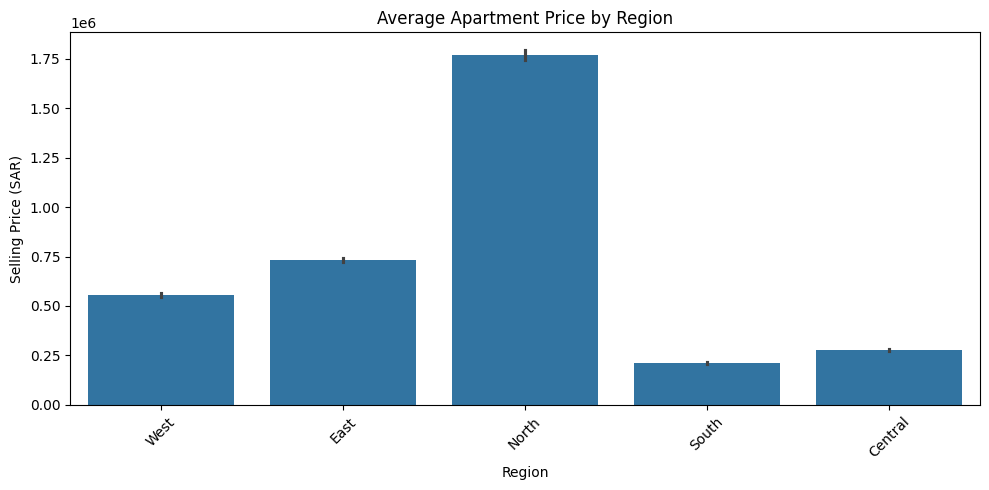

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10, 5))
sns.barplot(data=merged_df, x='Region', y='Selling Price (SAR)', estimator='mean')
plt.title('Average Apartment Price by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-b4898b78e4e0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_df = merged_df.set_index('random_date').resample('M')['Selling Price (SAR)'].mean()


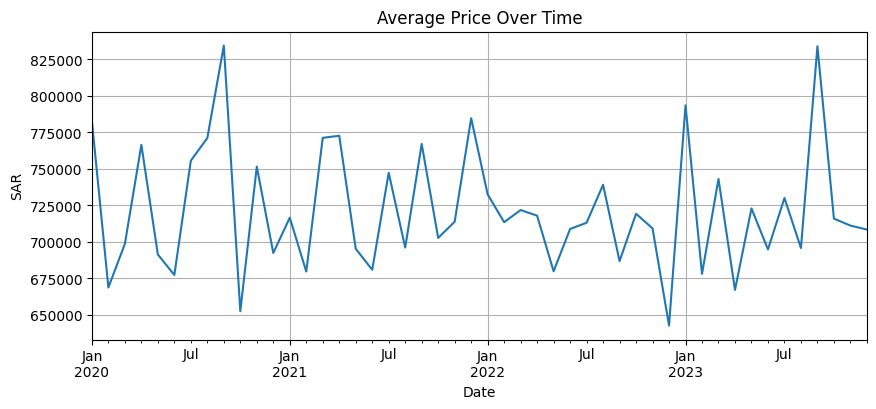

In [7]:
time_df = merged_df.set_index('random_date').resample('M')['Selling Price (SAR)'].mean()
time_df.plot(figsize=(10, 4), title='Average Price Over Time')
plt.ylabel('SAR')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [8]:

fig_map = px.scatter_mapbox(
    merged_df.sample(500),
    lat="latitude",
    lon="longitude",
    color="Selling Price (SAR)",
    size="Area (sqm)",
    hover_name="Neighborhood",
    hover_data=["Bedrooms", "Bathrooms", "random_date"],
    color_continuous_scale="Viridis",
    zoom=10,
    height=500
)
fig_map.update_layout(mapbox_style="open-street-map")
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()


In [9]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [21]:
!ngrok config add-authtoken "2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [25]:
from pyngrok import ngrok

public_url = ngrok.connect(addr=8501, proto="http")
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://7689-34-16-165-97.ngrok-free.app" -> "http://localhost:8501"
